In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from itertools import combinations
from random import random
import math
import pandas as pd
import statistics as stat
from decimal import Decimal as D
import matplotlib.pyplot as plt
import copy
import time
def findMax():  
  max = 0
  max_index = 0
  for a in cliqueList:
    x = len(a)
    #print(x)
    if max < x:
      max = x
      max_index = a
  #print(max_index)
  return max_index

def removeMax(max_index,tempMatrix):
  for i in range(len(max_index)-1,-1,-1):
    tempMatrix = np.delete(tempMatrix,(max_index[i]),axis=0)
    tempMatrix = np.delete(tempMatrix,(max_index[i]),axis=1)
  #print(tempMatrix, "matrix")
  return tempMatrix

def partition(arr, low, high):
    i = (low-1)         # index of smaller element
    pivot = arr[high]     # pivot
 
    for j in range(low, high):
        if arr[j] <= pivot:
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]
 
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return (i+1)
    
def quickSort(arr, low, high):
    if len(arr) == 1:
        return arr
    if low < high:
        pi = partition(arr, low, high)
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)
def removeCopies(cliqueList): 
  for subset in cliqueList:
    for otherSubset in cliqueList:
      if otherSubset != subset:
        if set(otherSubset) == set(subset):
          cliqueList.remove(otherSubset)


def ERDetermined(n, p, e): 
    V = set([v for v in range(n)])
    E = set()
    remainingE = e
    while remainingE > 0:
      for combination in combinations(V, 2):
          a = random()
          if a < p:
            if combination not in E and remainingE > 0:
              E.add(combination)
              remainingE -=1

    g = nx.Graph()
    g.add_nodes_from(V)
    g.add_edges_from(E)
    array = np.random.randint(0,1, size=(len(V), len(V)))
    
    for i in E:

      x = i[0]
      y = i[1]
      array[x][y] = 1
      array[y][x] = 1

    print(len(array))
    return g,array
def ER(n, p):
    V = set([v for v in range(n)])
    E = set()
    for combination in combinations(V, 2):
        a = random()
        if a < p:
            E.add(combination)

    g = nx.Graph()
    g.add_nodes_from(V)
    g.add_edges_from(E)
    array = np.random.randint(0,1, size=(len(V), len(V)))
    
    for i in E:

      x = i[0]
      y = i[1]
      array[x][y] = 1
      array[y][x] = 1

    print(array)
    return g,array

n = 6
p = 0.2
e = 8
G, A = ERDetermined(n, p, e)
#pos = nx.spring_layout(G)
#nx.draw_networkx(G, pos)
#plt.title("Random Graph Generation Example")
#plt.show()

length = len(A)

6
time: 155 ms (started: 2021-12-27 19:56:36 +00:00)


In [ ]:
######greedy
total = 0
while len(A)>0:  #O n
  total+=1
  cliqueList = list()
  length = len(A)
  C = list()
  maxSize = 0
  j=0
  for tempi in range(length): #O n
    i = tempi #i =1
    N1 = i #n1 = 1
    alone = True
    for singleVertex in range(length): #O n
      if A[i][singleVertex] == 1:
        alone = False
    if alone:
      C.append(i)
      cliqueList.append(C) 
    for  tempj in range(length): #O n
      j = tempj
      while j<length: #O n
        if j in C:
          j+=1
          continue 
        elif i == j:
          j+=1
          continue
        elif A[i][j] == 1:
          N2 = j
          if len(C) > 0:
            for element in C: #O K
              if A[element][j] != 1:
                j+=1
                break
              elif element == C[-1]:
                C.append(j)
                i=j
                j=0
                break
          else:
            C.append(N1)
            C.append(N2)
            i = j
            j = 0
        else:
          j+=1
      if maxSize < len(C):
        maxSize = len(C)
      if len(C) > 0 and C not in cliqueList:
        cliqueList.append(C)  
      C = list()
      i=tempi
  #print(maxSize," = k ")
  #O (N^3 * K)
  #print(cliqueList)
  removeCopies(cliqueList)#O n^2
  print(cliqueList)
  max_index = findMax() #O n
  quickSort(max_index,0,len(max_index)-1)#O n^2
  A = removeMax(max_index,A)#O n
print("k = ",total)

k =  0
time: 43.7 ms (started: 2021-12-27 19:48:53 +00:00)


In [ ]:
###### Brute force

def checkClique(M,subsets):
  clique = True
  for subset in subsets:
    #print('a')
    for element in subset:# [1]
      for other in subset:
        if element != other and M[element][other] == 0 :
          clique = False
  return clique

def Partition(S,N,subsets,k,M):
  if k > len(S):
     print('k is larger than number of vertices')
     return False
  if k == len(S):
    result= []
    for element in S:
      result.append([element])
    print('partitioned with k =', k ,' as ', '1-'*(k-1)+'1')
    print(result)
    return True
  # if everything is ok start recursion []
  for i in range(len(subsets)): #[6,5,3,2,1,0][][]
    subsetsRec = copy.deepcopy(subsets)
    if N>0:
      subsetsRec[i].append(S[N-1])
      if Partition(S,N-1,subsetsRec,k,M):
        return True
      #print(subsetsRec)
    else:
      #print('N bitti', subsetsRec)
      if checkClique(M,subsetsRec):
        print(subsetsRec)
        print('partitioned with k =', k , 'as',[len(subsetsRec[i]) for i in range(k)])
        return True;

Set = [i for i in range(length)]
N = len(Set)
k =1
found = False

while not found:
  subsets = [[] for i in range(k)]
  found = Partition(Set,N,subsets,k,A)
  if found : print("Our k value is =",k)
  k+=1


[[5, 4, 3], [2, 1], [0]]
partitioned with k = 3 as [3, 2, 1]
Our k value is = 3
time: 39.8 ms (started: 2021-12-27 19:56:31 +00:00)


In [ ]:
#performance analysis
max = 5
testRepeat = 100
kListGreedy = []
timeListGreedy = []
standartDevList = []
meanList = []
errorList = []
for n_ in range(max):
  for i in range(testRepeat):
    n = 10 * (n_+1)
    p = 0.2
    e = 40
    G, A = ERDetermined(n, p, e)
    total = 0
    while len(A)>0:  #O n
      total+=1
      cliqueList = list()
      length = len(A)
      C = list()
      maxSize = 0
      j=0
      for tempi in range(length): #O n
        i = tempi #i =1
        N1 = i #n1 = 1
        alone = True
        for singleVertex in range(length): #O n
          if A[i][singleVertex] == 1:
            alone = False
        if alone:
          C.append(i)
          cliqueList.append(C) 
        for  tempj in range(length): #O n
          j = tempj
          while j<length: #O n
            if j in C:
              j+=1
              continue 
            elif i == j:
              j+=1
              continue
            elif A[i][j] == 1:
              N2 = j
              if len(C) > 0:
                for element in C: #O K
                  if A[element][j] != 1:
                    j+=1
                    break
                  elif element == C[-1]:
                    C.append(j)
                    i=j
                    j=0
                    break
              else:
                C.append(N1)
                C.append(N2)
                i = j
                j = 0
            else:
              j+=1
          if maxSize < len(C):
            maxSize = len(C)
          if len(C) > 0 and C not in cliqueList:
            cliqueList.append(C)  
          C = list()
          i=tempi
      #print(maxSize," = k ")
      #O (N^3 * K)
      #print(cliqueList)
      removeCopies(cliqueList)#O n^2
      #print(cliqueList)
      max_index = findMax() #O n
      quickSort(max_index,0,len(max_index)-1)#O n^2
      A = removeMax(max_index,A)#O n
      kListGreedy.append(total)
      timeListGreedy.append((time.time() - start_time))
    print("k = ",total)
      #print("--- %s seconds ---" % (time.time() - start_time))
  standart_deviation = np.std(timeListGreedy)
  standart_error = standart_deviation / math.sqrt(len(timeListGreedy))
  standartDevList.append(standart_deviation)
  errorList.append(standart_error)
  meanList.append(stat.mean(timeListGreedy))
print(kListGreedy)
print(timeListGreedy) 

In [ ]:

dataV = {'size(v)':  [10*(i+1) for i in range(max)],
        'standart_deviation':  standartDevList,
        'standart_error': errorList,
        'mean': meanList
        }
dfV = pd.DataFrame(dataV)
dfV =dfV.set_index('size(v)')
print (dfV)

         standart_deviation  standart_error          mean
size(v)                                                  
10                 0.234107        0.015239  10581.176587
20                 1.011684        0.028300  10582.691313
30                 4.714075        0.079276  10587.193924
40                19.079808        0.227933  10603.898733
50                36.362724        0.338232  10629.100578
time: 19.3 ms (started: 2021-12-27 19:31:07 +00:00)


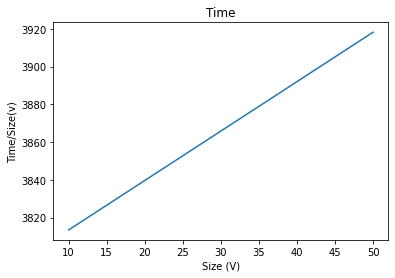

time: 176 ms (started: 2021-12-27 17:42:41 +00:00)


In [ ]:

plt.plot([10*(i+1) for i in range(max)], np.linspace(timeListGreedy[0], timeListGreedy[-1], 5))
plt.title('Time')
plt.xlabel('Size (V)')
plt.ylabel('Time/Size(v)')
plt.show()

In [ ]:
max = 5
testRepeat = 100
kListGreedy = []
timeListGreedy = []
standartDevList = []
meanList = []
errorList = []
for n_ in range(max):
  for i in range(testRepeat):
    n = 20
    p = 0.2
    e = 10 * (n_+1)
    G, A = ERDetermined(n, p, e)
    total = 0
    while len(A)>0:  #O n
      total+=1
      cliqueList = list()
      length = len(A)
      C = list()
      maxSize = 0
      j=0
      for tempi in range(length): #O n
        i = tempi #i =1
        N1 = i #n1 = 1
        alone = True
        for singleVertex in range(length): #O n
          if A[i][singleVertex] == 1:
            alone = False
        if alone:
          C.append(i)
          cliqueList.append(C) 
        for  tempj in range(length): #O n
          j = tempj
          while j<length: #O n
            if j in C:
              j+=1
              continue 
            elif i == j:
              j+=1
              continue
            elif A[i][j] == 1:
              N2 = j
              if len(C) > 0:
                for element in C: #O K
                  if A[element][j] != 1:
                    j+=1
                    break
                  elif element == C[-1]:
                    C.append(j)
                    i=j
                    j=0
                    break
              else:
                C.append(N1)
                C.append(N2)
                i = j
                j = 0
            else:
              j+=1
          if maxSize < len(C):
            maxSize = len(C)
          if len(C) > 0 and C not in cliqueList:
            cliqueList.append(C)  
          C = list()
          i=tempi
      #print(maxSize," = k ")
      #O (N^3 * K)
      #print(cliqueList)
      removeCopies(cliqueList)#O n^2
      #print(cliqueList)
      max_index = findMax() #O n
      quickSort(max_index,0,len(max_index)-1)#O n^2
      A = removeMax(max_index,A)#O n
      kListGreedy.append(total)
      timeListGreedy.append((time.time() - start_time))
    print("k = ",total)
      #print("--- %s seconds ---" % (time.time() - start_time))
  standart_deviation = np.std(timeListGreedy)
  standart_error = standart_deviation / math.sqrt(len(timeListGreedy))
  standartDevList.append(standart_deviation)
  errorList.append(standart_error)
  meanList.append(stat.mean(timeListGreedy))
print(kListGreedy)
print(timeListGreedy)


In [ ]:
dataE = {'size(e)':  [10*(i+1) for i in range(max)],
        'standart_deviation':  standartDevList,
        'standart_error': errorList,
        'mean': meanList
        }
dfE = pd.DataFrame(dataE)
dfE =dfE.set_index('size(e)')
print (dfE)

         standart_deviation  standart_error         mean
size(e)                                                 
10                 0.828112        0.019893  4276.629834
20                 1.534015        0.027097  4277.871850
30                 2.120372        0.031959  4278.868841
40                 2.808837        0.038107  4279.852769
50                 3.605067        0.045120  4280.892758
time: 17.5 ms (started: 2021-12-27 17:44:17 +00:00)


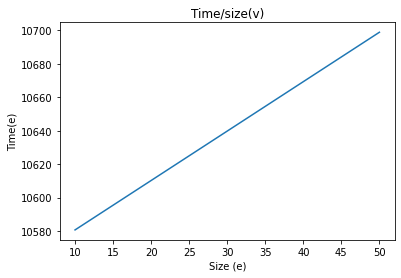

time: 209 ms (started: 2021-12-27 19:31:07 +00:00)


In [ ]:
import matplotlib.pyplot as plt

Year = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
Unemployment_Rate = [9.8,12,8,7.2,6.9,7,6.5,6.2,5.5,6.3]
plt.plot([10*(i+1) for i in range(max)], np.linspace(timeListGreedy[0], timeListGreedy[-1], 5))
plt.title('Time/size(v)')
plt.xlabel('Size (e)')
plt.ylabel('Time(e)')
plt.show()

In [ ]:
#### correction



total = 0
lastList= []
checkA = A
while len(A)>0:  #O n
  total+=1
  cliqueList = list()
  length = len(A)
  C = list()
  maxSize = 0
  j=0
  for tempi in range(length): #O n
    i = tempi #i =1
    N1 = i #n1 = 1
    alone = True
    for singleVertex in range(length): #O n
      if A[i][singleVertex] == 1:
        alone = False
    if alone:
      C.append(i)
      cliqueList.append(C) 
    for  tempj in range(length): #O n
      j = tempj
      while j<length: #O n
        if j in C:
          j+=1
          continue 
        elif i == j:
          j+=1
          continue
        elif A[i][j] == 1:
          N2 = j
          if len(C) > 0:
            for element in C: #O K
              if A[element][j] != 1:
                j+=1
                break
              elif element == C[-1]:
                C.append(j)
                i=j
                j=0
                break
          else:
            C.append(N1)
            C.append(N2)
            i = j
            j = 0
        else:
          j+=1
      if maxSize < len(C):
        maxSize = len(C)
      if len(C) > 0 and C not in cliqueList:
        cliqueList.append(C)  
      C = list()
      i=tempi
  #print(maxSize," = k ")
  #O (N^3 * K)
  #print(cliqueList)
  removeCopies(cliqueList)#O n^2
  print(cliqueList)
  max_index = findMax() #O n
  lastList.append(max_index)
  quickSort(max_index,0,len(max_index)-1)#O n^2
  A = removeMax(max_index,A)#O n
print("k = ",total)
print(lastList)
def checkCorrection(M,subsetcheck):
  clique = True
  for element in subsetcheck:# [1]
    for other in subsetcheck:
      if element != other and M[element][other] == 0 :
        clique = False
  return clique
testCount = 10
for element in lastList:
  if not checkCorrection(checkA,element):
    print("this algorithm is wrong")
    break
  else: 
    checkA = removeMax(element,checkA)#O n
print("everthing is ok.")



k =  0
[]
everthing is ok.
time: 94.8 ms (started: 2021-12-27 19:31:08 +00:00)


In [ ]:
kListGreedy = []
kListBruteForce = []
repeat = 1000
for i in range(repeat):
  n = 7
  p = 0.2
  e = 8
  G, A = ERDetermined(n, p, e)
  #pos = nx.spring_layout(G)
  #nx.draw_networkx(G, pos)
  #plt.title("Random Graph Generation Example")
  #plt.show()
  bruteA = copy.deepcopy(A)
  length = len(A)
  Set = [i for i in range(length)]
  N = len(Set)
  k =1
  found = False
  #bruteforce

  while not found:
    subsets = [[] for i in range(k)]
    found = Partition(Set,N,subsets,k,bruteA)
    if found : 
      print("Our k value is =",k)
      kListBruteForce.append(k)
    k+=1


  #greedy
  ######greedy
  total = 0
  while len(A)>0:  #O n
    total+=1
    cliqueList = list()
    length = len(A)
    C = list()
    maxSize = 0
    j=0
    for tempi in range(length): #O n
      i = tempi #i =1
      N1 = i #n1 = 1
      alone = True
      for singleVertex in range(length): #O n
        if A[i][singleVertex] == 1:
          alone = False
      if alone:
        C.append(i)
        cliqueList.append(C) 
      for  tempj in range(length): #O n
        j = tempj
        while j<length: #O n
          if j in C:
            j+=1
            continue 
          elif i == j:
            j+=1
            continue
          elif A[i][j] == 1:
            N2 = j
            if len(C) > 0:
              for element in C: #O K
                if A[element][j] != 1:
                  j+=1
                  break
                elif element == C[-1]:
                  C.append(j)
                  i=j
                  j=0
                  break
            else:
              C.append(N1)
              C.append(N2)
              i = j
              j = 0
          else:
            j+=1
        if maxSize < len(C):
          maxSize = len(C)
        if len(C) > 0 and C not in cliqueList:
          cliqueList.append(C)  
        C = list()
        i=tempi
    #print(maxSize," = k ")
    #O (N^3 * K)
    #print(cliqueList)
    removeCopies(cliqueList)#O n^2
    print(cliqueList)
    max_index = findMax() #O n
    quickSort(max_index,0,len(max_index)-1)#O n^2
    A = removeMax(max_index,A)#O n
  print("k = ",total)
  kListGreedy.append(total)


Streaming output truncated to the last 5000 lines.
partitioned with k = 4 as [3, 2, 1, 1]
Our k value is = 4
[[0, 3, 5], [1, 5], [2, 3], [3, 4], [6, 3, 0]]
[[0], [1], [2], [3]]
[[0], [1], [2]]
[[0], [1]]
[[0]]
k =  5
7
[[6, 2, 1], [5], [4, 3], [0]]
partitioned with k = 4 as [3, 1, 2, 1]
Our k value is = 4
[[0, 3], [1, 6, 2], [2, 3, 1], [3, 4], [5, 2], [6, 2, 1]]
[[0, 1], [1, 2], [3]]
[[0], [1]]
[[0]]
k =  4
7
[[6, 5], [4, 3], [2, 1], [0]]
partitioned with k = 4 as [2, 2, 2, 1]
Our k value is = 4
[[0, 1], [1, 2], [1, 3], [3, 4], [5, 2, 4], [6, 5]]
[[0, 1], [1, 2], [3]]
[[0], [1]]
[[0]]
k =  4
7
[[6, 5], [4, 1], [3, 2, 0]]
partitioned with k = 3 as [2, 2, 3]
Our k value is = 3
[[0, 6], [1, 4], [2, 3, 0], [4, 6], [5, 2], [6, 5]]
[[0, 1], [1, 3], [2, 3]]
[[0, 1]]
k =  3
7
[[6, 1], [5, 3], [4, 2, 0]]
partitioned with k = 3 as [2, 2, 3]
Our k value is = 3
[[0, 1], [1, 5], [1, 6], [2, 4, 0], [3, 5], [6, 2]]
[[0, 2], [0, 3], [1, 2]]
[[0], [1]]
[[0]]
k =  4
7
[[6, 3, 0], [5, 1], [4], [2]]
parti

In [ ]:
print(kListBruteForce)
print(kListGreedy)

[3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3]
[3, 4, 3, 3, 3, 3, 2, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 2, 4, 2, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3]
time: 1.31 ms (started: 2021-12-27 20:17:41 +00:00)


In [ ]:
###ratio bound

def ratioBound(kListBruteForce, kListGreedy):
  ratioList = []
  for i in range(len(kListBruteForce)):
    ratioList.append(kListBruteForce[i] / kListGreedy[i])
  print(stat.mean(ratioList))




ratioBound(kListBruteForce, kListGreedy)

0.96905
time: 14.6 ms (started: 2021-12-27 20:28:34 +00:00)


In [ ]:
ratioData = {'#of Graphs':  [100,500,1000],
            '5 vertices': [1,1,1] ,
            '6 vertices': [0.9666666666666667,0.978,0.9794166666666667],
            '7 vertices': [0.9805,0.9655,0.96905]
            }
dfR = pd.DataFrame(ratioData)
dfR =dfR.set_index('#of Graphs')
print (dfR)

            5 vertices  6 vertices  7 vertices
#of Graphs                                    
100                  1    0.966667     0.98050
500                  1    0.978000     0.96550
1000                 1    0.979417     0.96905
time: 19.6 ms (started: 2021-12-27 20:28:41 +00:00)
